# What is our Data Like?

In the past I've encountered the so-called "learning the average" problem. My autoencoder would simply learn to generate gray images.

Having already extensively played around with the architecture and hyper parameters and even achieved limited success with that, I now want to do something I should have probably done from the beginning: turning to the data itself.

## TL;DR

It turns out that my pixel values are almost uniformly distributed, which totally explains why the networks I train simply resort to producing gray images (the average values for all pixels)!!!

For the longer story, read this notebook.

In [1]:
# Setup

import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img, img_to_array
import seaborn as sns

IMG_PATH = '/home/quickbeam/dlrc/training_data/Data/noisy_real_data/0.png'

Using TensorFlow backend.


## What does the Data Look Like?

Just as a reminder for humans, here's the image we're working with.

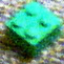

In [2]:
from IPython.display import Image
Image(IMG_PATH, width=200)

## How is data distributed?

Start with some basic statistics...

In [3]:
img = load_img(IMG_PATH)
img_ar = img_to_array(img)
img_ar.mean(), img_ar.std()

(127.62313, 73.624298)

### Raw Pixel Distribution

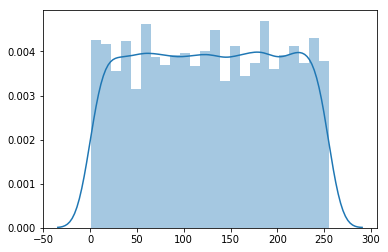

In [4]:
sns.distplot(img_ar.flatten())

### Z-score Normed

I foolishly hoped that maybe normalizing would make things different. However, the whole point of normalizing is that only the range of the data is changed while its distributional properties stay the same...

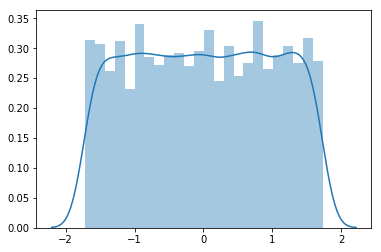

In [5]:
normed = (img_ar - img_ar.mean()) / img_ar.std()
sns.distplot(normed.flatten())

### [0:1] Normed

At this point just out of curiosity...

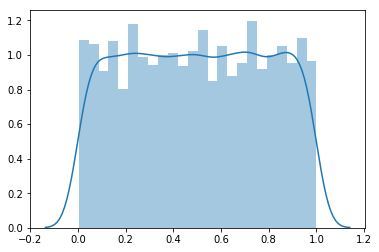

In [6]:
normed = img_ar / 255
sns.distplot(normed.flatten())